In [ ]:
import numpy as np

# Максимум 5 баллов - по 1 баллу за задание

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один
вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

#### 1.1 Вариант с циклами

In [ ]:
def diagonal_multiplication_1(X):
  res = 1

  for i in range(min(X.shape)):
    if X[i][i] != 0:
      res *= X[i][i]

  return res

In [ ]:
diagonal_multiplication_1(X)

3

#### 1.2 Векторизованный вариант

In [ ]:
def diagonal_multiplication_2(X):
  d = np.diag(X)
  zeroes = np.zeros_like(d)
  return np.prod(np.setdiff1d(d, zeroes))

In [ ]:
diagonal_multiplication_2(X)

3

#### 1.3 Еще один векторизованный вариант

In [ ]:
def diagonal_multiplication_3(X):
  return np.prod(np.diag(X)[np.nonzero(np.diag(X))])

In [ ]:
diagonal_multiplication_3(X)

3

#### Тестирование на разных данных

In [ ]:
X1 = np.random.randint(low=10, size=(100, 150))

In [ ]:
%timeit diagonal_multiplication_1(X1)
%timeit diagonal_multiplication_2(X1)
%timeit diagonal_multiplication_3(X1)

<ipython-input-3-2a75922032ac>:6: RuntimeWarning: overflow encountered in scalar multiply
  res *= X[i][i]


72.5 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
52.5 µs ± 939 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.01 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
X2 = np.random.randint(low=5, size=(1300, 1000))

%timeit diagonal_multiplication_1(X2)
%timeit diagonal_multiplication_2(X2)
%timeit diagonal_multiplication_3(X2)

<ipython-input-3-2a75922032ac>:6: RuntimeWarning: overflow encountered in scalar multiply
  res *= X[i][i]


456 µs ± 117 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
66.3 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.1 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
X3 = np.random.randint(low=5, size=(10000, 20000))

%timeit diagonal_multiplication_1(X3)
%timeit diagonal_multiplication_2(X3)
%timeit diagonal_multiplication_3(X3)

<ipython-input-3-2a75922032ac>:6: RuntimeWarning: overflow encountered in scalar multiply
  res *= X[i][i]


3.75 ms ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
248 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
81.1 µs ± 8.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 2. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [ ]:
x = np.array([1, 2, 4, 2])
y = np.array([4, 2, 1, 2])

#### 2.1 Векторизованный вариант(только для векторов с неотрицательными элементами)

In [ ]:
def multiset_check1(x, y):
  return np.array_equal(np.bincount(x), np.bincount(y))

In [ ]:
multiset_check1(x, y)

True

#### 2.2 Векторизованный вариант

In [ ]:
def multiset_check2(x, y):
  return np.array_equal(np.sort(x), np.sort(y))

In [ ]:
multiset_check2(x, y)

True

#### 2.3 Вариант с циклами

In [ ]:
def multiset_check3(x, y):
  if x.size != y.size:
    return False

  x_items = dict()
  y_items = dict()

  for el in x:
    x_items[el] = x_items.get(el, 0) + 1

  for el in y:
    y_items[el] = y_items.get(el, 0) + 1

  return x_items == y_items

In [ ]:
multiset_check3(np.array([1, 2, 3]), np.array([1, 2, 4]))

False

In [ ]:
multiset_check3(x, y)

True

#### Тестирование на разных данных

In [ ]:
x1 = np.random.randint(low=1, high=100, size=100)
y1 = np.random.randint(low=1, high=100, size=100)

%timeit multiset_check1(x1, y1)
%timeit multiset_check2(x1, y1)
%timeit multiset_check3(x1, y1)

3.98 µs ± 839 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.49 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
29.2 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x2 = np.random.randint(low=1, high=100, size=5000)
y2 = np.random.randint(low=1, high=100, size=5000)

%timeit multiset_check1(x2, y2)
%timeit multiset_check2(x2, y2)
%timeit multiset_check3(x2, y2)

14.9 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
270 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.54 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
x3 = np.random.randint(low=1, high=100, size=10000)
y3 = np.random.randint(low=1, high=100, size=10000)

%timeit multiset_check1(x3, y3)
%timeit multiset_check2(x3, y3)
%timeit multiset_check3(x3, y3)

36.1 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
598 µs ± 3.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.93 ms ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 3. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

#### 3.1 Вариант с циклами

In [ ]:
def max_beforezero1(X):
  m = float('-inf')

  for i in range(1, X.size):
    if X[i - 1] == 0:
      m = max(m, X[i])

  return m

In [ ]:
max_beforezero1(x)

5

#### 3.2 Векторизованный вариант

In [ ]:
def max_beforezero2(X):
  return np.max(X[1:][(X == 0)[:-1]])

In [ ]:
max_beforezero2(x)

5

#### 3.3

In [ ]:
def max_beforezero3(arr):
  return np.max(arr[np.where(arr[:-1] == 0)[0] + 1])

In [ ]:
max_beforezero3(x)

5

#### Тестирование на разных данных

In [ ]:
x1 = np.random.randint(low=-100, high=100, size=100)
x1[0] = 0

%timeit max_beforezero1(x1)
%timeit max_beforezero2(x1)
%timeit max_beforezero3(x1)

13.4 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.51 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.93 µs ± 54.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x2 = np.random.randint(low=-100, high=100, size=1000)
x2[0] = 0

%timeit max_beforezero1(x2)
%timeit max_beforezero2(x2)
%timeit max_beforezero3(x2)

171 µs ± 65.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.57 µs ± 586 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.71 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x3 = np.random.randint(low=-100, high=100, size=100000)
x3[0] = 0

%timeit max_beforezero1(x3)
%timeit max_beforezero2(x3)
%timeit max_beforezero3(x3)

13.3 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
55.9 µs ± 648 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
59.6 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 4. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [ ]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

im = imageio.imread('pict.jpg')

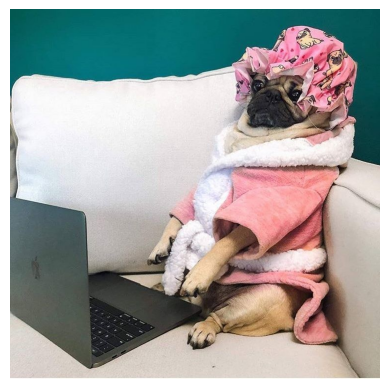

In [ ]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [ ]:
im.shape

(750, 750, 3)

In [ ]:
im

array([[[  3,  88,  81],
        [  3,  88,  81],
        [  3,  88,  81],
        ...,
        [  3,  81,  83],
        [  3,  81,  83],
        [  3,  81,  83]],

       [[  3,  88,  81],
        [  3,  88,  81],
        [  3,  88,  81],
        ...,
        [  3,  81,  83],
        [  3,  81,  83],
        [  3,  81,  83]],

       [[  3,  88,  81],
        [  3,  88,  81],
        [  3,  88,  81],
        ...,
        [  3,  81,  83],
        [  3,  81,  83],
        [  3,  81,  83]],

       ...,

       [[216, 208, 206],
        [213, 208, 204],
        [215, 207, 205],
        ...,
        [166, 163, 148],
        [168, 162, 150],
        [166, 163, 148]],

       [[255, 252, 252],
        [255, 253, 250],
        [255, 252, 252],
        ...,
        [255, 253, 240],
        [255, 252, 241],
        [255, 254, 241]],

       [[255, 254, 253],
        [255, 254, 253],
        [255, 254, 253],
        ...,
        [255, 255, 244],
        [255, 255, 244],
        [255, 255, 244]]

#### 4.1 Вариант с циклом

In [ ]:
def rgb_to_gray1(image):
  height, width, n_channels = image.shape
  weights = np.array([0.299, 0.587, 0.114])

  gray_img = np.zeros((height, width))

  for i in range(height):
    for j in range(width):
      gray_img[i, j] = sum(image[i, j, k] * weights[k] for k in range(n_channels))

  return gray_img

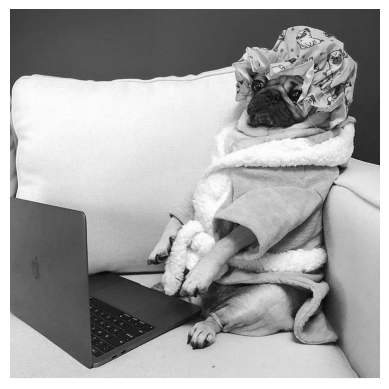

In [ ]:
plt.imshow(rgb_to_gray1(im), cmap='gray')
plt.axis('off')
plt.show()

#### 4.2 Векторизованный вариант

In [ ]:
def rgb_to_gray2(image):
    weights = np.array([0.299, 0.587, 0.114])
    return np.dot(image, weights)

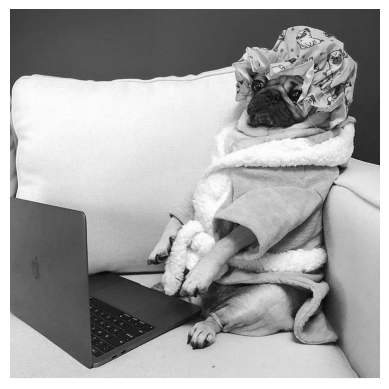

In [ ]:
plt.imshow(rgb_to_gray2(im), cmap='gray')
plt.axis('off')
plt.show()

#### 4.3 Векторизованный вариант

In [ ]:
def rgb_to_gray3(image):
    weights = np.array([0.299, 0.587, 0.114]).reshape((1, 1, 3))
    return np.sum(image * weights, axis=2)

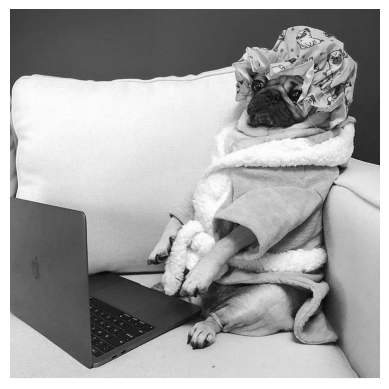

In [ ]:
plt.imshow(rgb_to_gray3(im), cmap='gray')
plt.axis('off')
plt.show()

#### Тестирование на разных данных

(194, 259, 3)


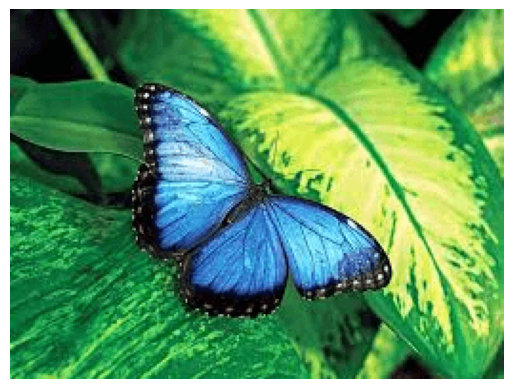

In [ ]:
im1 = imageio.imread('small.png')
print(im1.shape)

plt.imshow(im1)
plt.axis('off')
plt.show()

In [ ]:
%timeit rgb_to_gray1(im1)
%timeit rgb_to_gray2(im1)
%timeit rgb_to_gray3(im1)

87.7 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
723 µs ± 5.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.34 ms ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(630, 1200, 3)


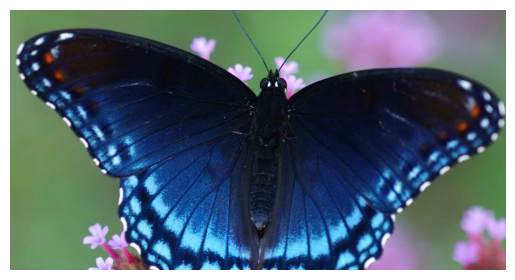

In [ ]:
im2 = imageio.imread('medium.png')
print(im2.shape)

plt.imshow(im2)
plt.axis('off')
plt.show()

In [ ]:
%timeit rgb_to_gray1(im2)
%timeit rgb_to_gray2(im2)
%timeit rgb_to_gray3(im2)

1.29 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
35.7 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(2159, 3250, 3)


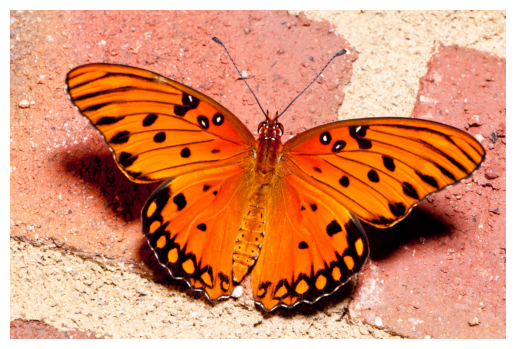

In [ ]:
im3 = imageio.imread('big.jpeg')
print(im3.shape)

plt.imshow(im3)
plt.axis('off')
plt.show()

In [ ]:
%timeit rgb_to_gray1(im3)
%timeit rgb_to_gray2(im3)
%timeit rgb_to_gray3(im3)

14.4 s ± 4.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
160 ms ± 50.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
324 ms ± 7.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 5. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])

#### 5.1 Вариант с циклами

In [ ]:
def run_length_encoding1(X):
  num = np.array(X[0])
  rep = np.array([], dtype=int)
  counter = 1

  for i in range(1, X.size):
    if X[i] == X[i - 1]:
      counter += 1
    else:
      rep = np.append(rep, counter)
      num = np.append(num, X[i])
      counter = 1

  rep = np.append(rep, counter)

  return (num, rep)

In [ ]:
run_length_encoding1(x)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

#### 5.2 Векторизованный вариант

In [ ]:
def run_length_encoding2(arr):
  arr = np.insert(arr, 0, 0)
  return (np.cumsum(np.diff(arr)[np.nonzero(np.diff(arr))]), np.diff(np.nonzero(np.diff(np.append(arr, 0)))).squeeze())

In [ ]:
run_length_encoding2(x)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

#### 5.3 Векторизованный вариант

In [ ]:
def run_length_encoding3(arr):
  diff = np.diff(x)
  boundaries = np.where(diff != 0)[0] + 1
  boundaries = np.concatenate(([0], boundaries, [arr.size]))

  num = arr[boundaries[:-1]]
  rep = np.diff(boundaries)

  return(num, rep)

In [ ]:
run_length_encoding3(x)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

#### Тестирование на разных данных

In [ ]:
x1 = np.random.randint(low=100, size=100)

%timeit run_length_encoding1(x1)
%timeit run_length_encoding2(x1)
%timeit run_length_encoding3(x1)

591 µs ± 137 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
30.6 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.2 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x2 = np.random.randint(low=100, size=1000)

%timeit run_length_encoding1(x2)
%timeit run_length_encoding2(x2)
%timeit run_length_encoding3(x2)

5.61 ms ± 59.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
40.6 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.1 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x3 = np.random.randint(low=100, size=10000)

%timeit run_length_encoding1(x3)
%timeit run_length_encoding2(x3)
%timeit run_length_encoding3(x3)

74.6 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
132 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.2 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

### Выводы

Реализации на NumPy работают ожидаемо быстрее наивных реализаций при помощи циклов, при этом время работы может отличаться в несколько тысяч раз, особенно это заметно при тестовых данных большЕго размера.

Среди реализаций на NumPy по времени выигрывают те, которые максимально используют возможности библиотеки(на примере 4 задачи - матричное умножение, взятое напрямую из библиотеки, работает в 2-3 раза быстрее, чем это же умножение, реализованное "в ручную", пусть и с использованием возможностей NumPy).